# EDA

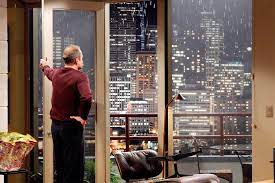

In [290]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as plx


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Erin Robinson	Buyer	Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible

Investor chosen is Erin Robinson. This person seeks to invest into a poor neighborhood, buy and resell the houses with a little profit. Her approach is socially responsible, so it can be assumed she want to up former not renovated houses to improve the neighborhood as a whole. Therefore mainly houses in the lower quantil are to be considered. Prices that are low and will still be low when reselling. 

The average costs to renovate a house in the USA are between 15k and 200k. The costs for remodeling the bathroom and kitchen in a medium range still account to around 120k according to https://www.rocketmortgage.com/learn/home-renovation-costs.
Thus we estimate the house will be resold for around 132k above purchase value to cover renovation costs and add 10% profit for the investor.


- find neighborhoods with low prices
    - houses in poor n will have bad graded and condition as there is no money for renovations
    - assumption 0 : the price of a house rises overproportionally to the squarefeet available
        - low squarefeet prices will indicate poor neighborhoods


    - need to consider here to filter for small lots as well, as big lots might be very rural
    filter by smaller than the median of lots
    - squarefeetliving15 will likely have similar values to sqftliving


    filter by sqftliving15 smaller than 1.5 times sqftliving
- a poor neighborhood will mainly consist of low prices, with bad grade and condition
    - assumption 1: poor = low price, low grade, low condition
- identify houses that have not been renovated
    - assumption 2: unrenovated houses will have lower prices than renovated ones

- additional bed, bathrooms, floors or waterfront are a plus, but not mandatory, will be ignored

- assumption 3: there is a correlation between zipcodes and prices

In [291]:
#  plot for low prices  vs grade vs condition(colour?)

In [310]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.shape
df.describe()
#df.info()  # date is not datetime
#df['date'] = pd.to_datetime(df['date'])
#df.head()
#df.zipcode.unique()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


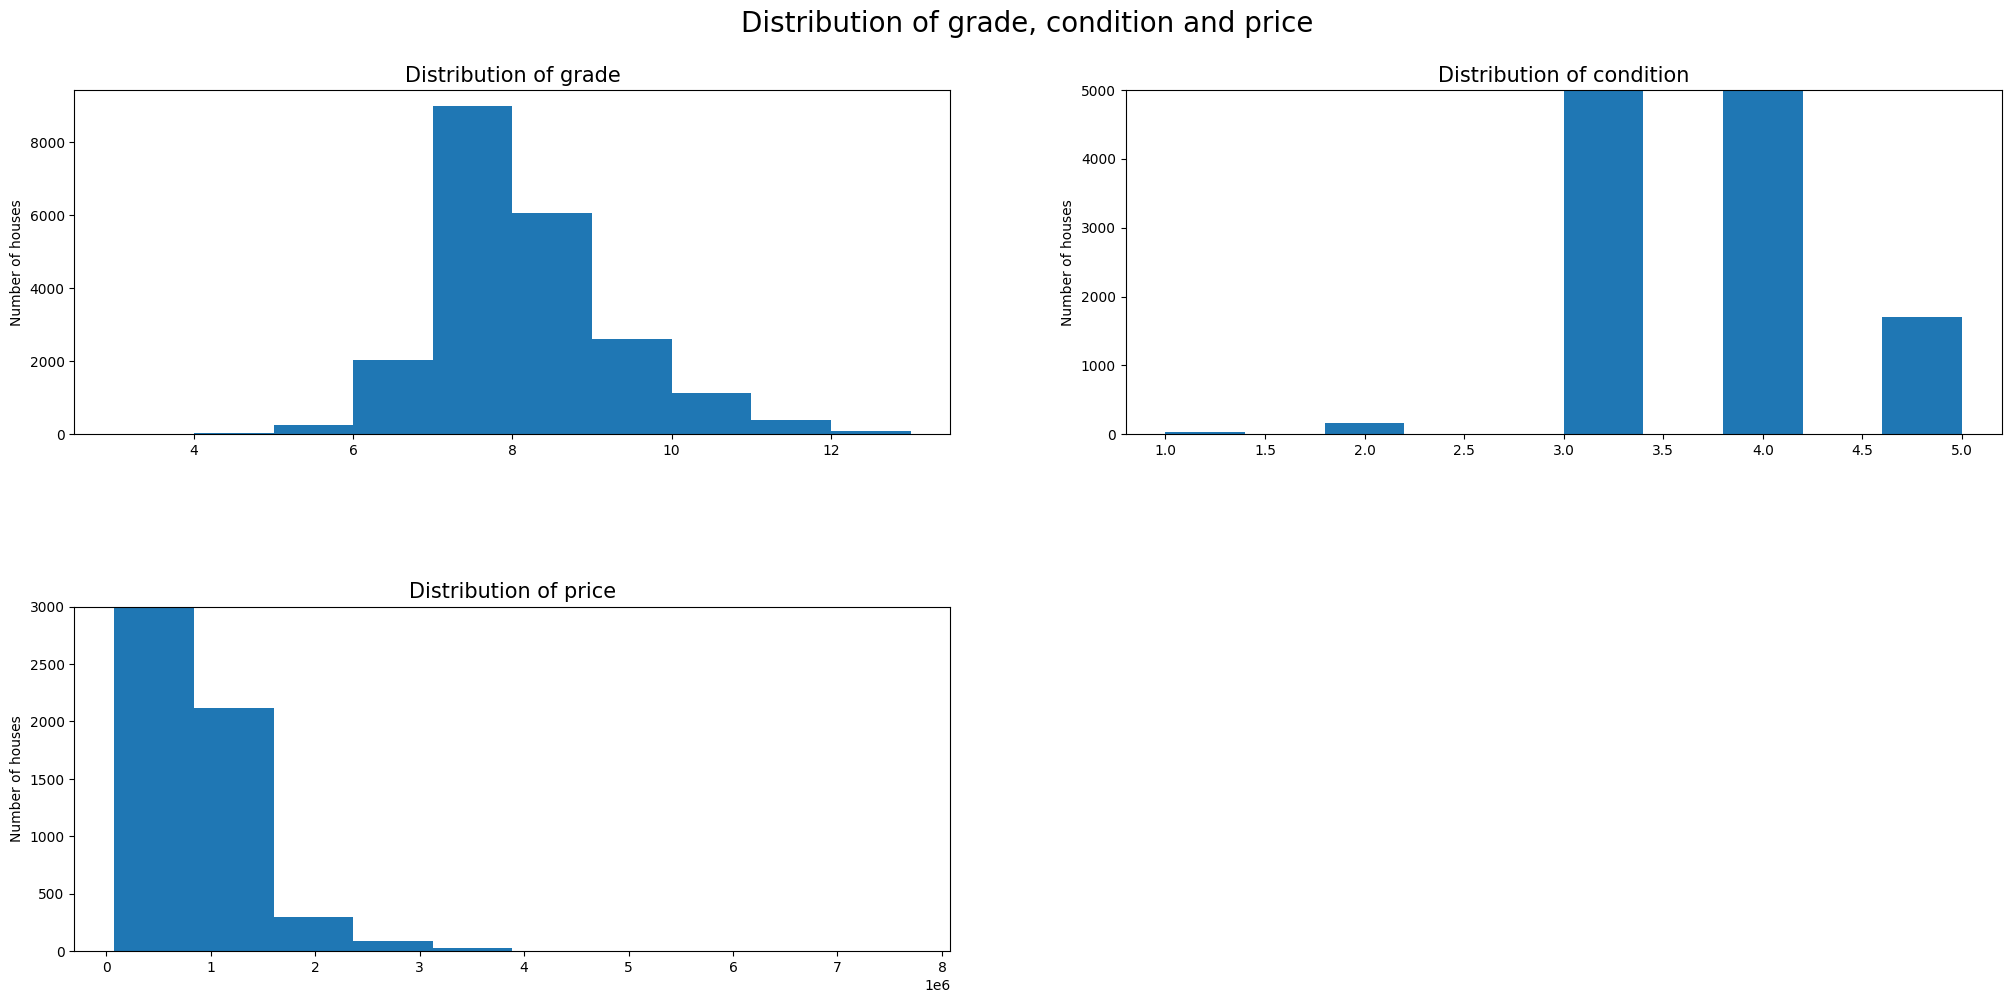

In [293]:
#describe shows we have some heavy outliers, lets check for the values that are interesting to us
fig, ax = plt.subplots(2,2, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of grade, condition and price', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x = df["grade"]) # creates boxplot for number of views
ax[0][0].set_ylabel("Number of houses", fontsize = 10) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of grade", fontsize = 15); # sets title for subplot

ax[0][1].hist(x = df['condition'])
ax[0][1].set_ylabel("Number of houses", fontsize = 10)
ax[0][1].set_ylim(0,5000)
ax[0][1].set_title("Distribution of condition", fontsize = 15);

ax[1][0].hist(x = df['price'])
ax[1][0].set_ylabel("Number of houses", fontsize = 10)
ax[1][0].set_ylim(0,3000)
ax[1][0].set_title("Distribution of price", fontsize = 15);

fig.delaxes(ax[1][1])

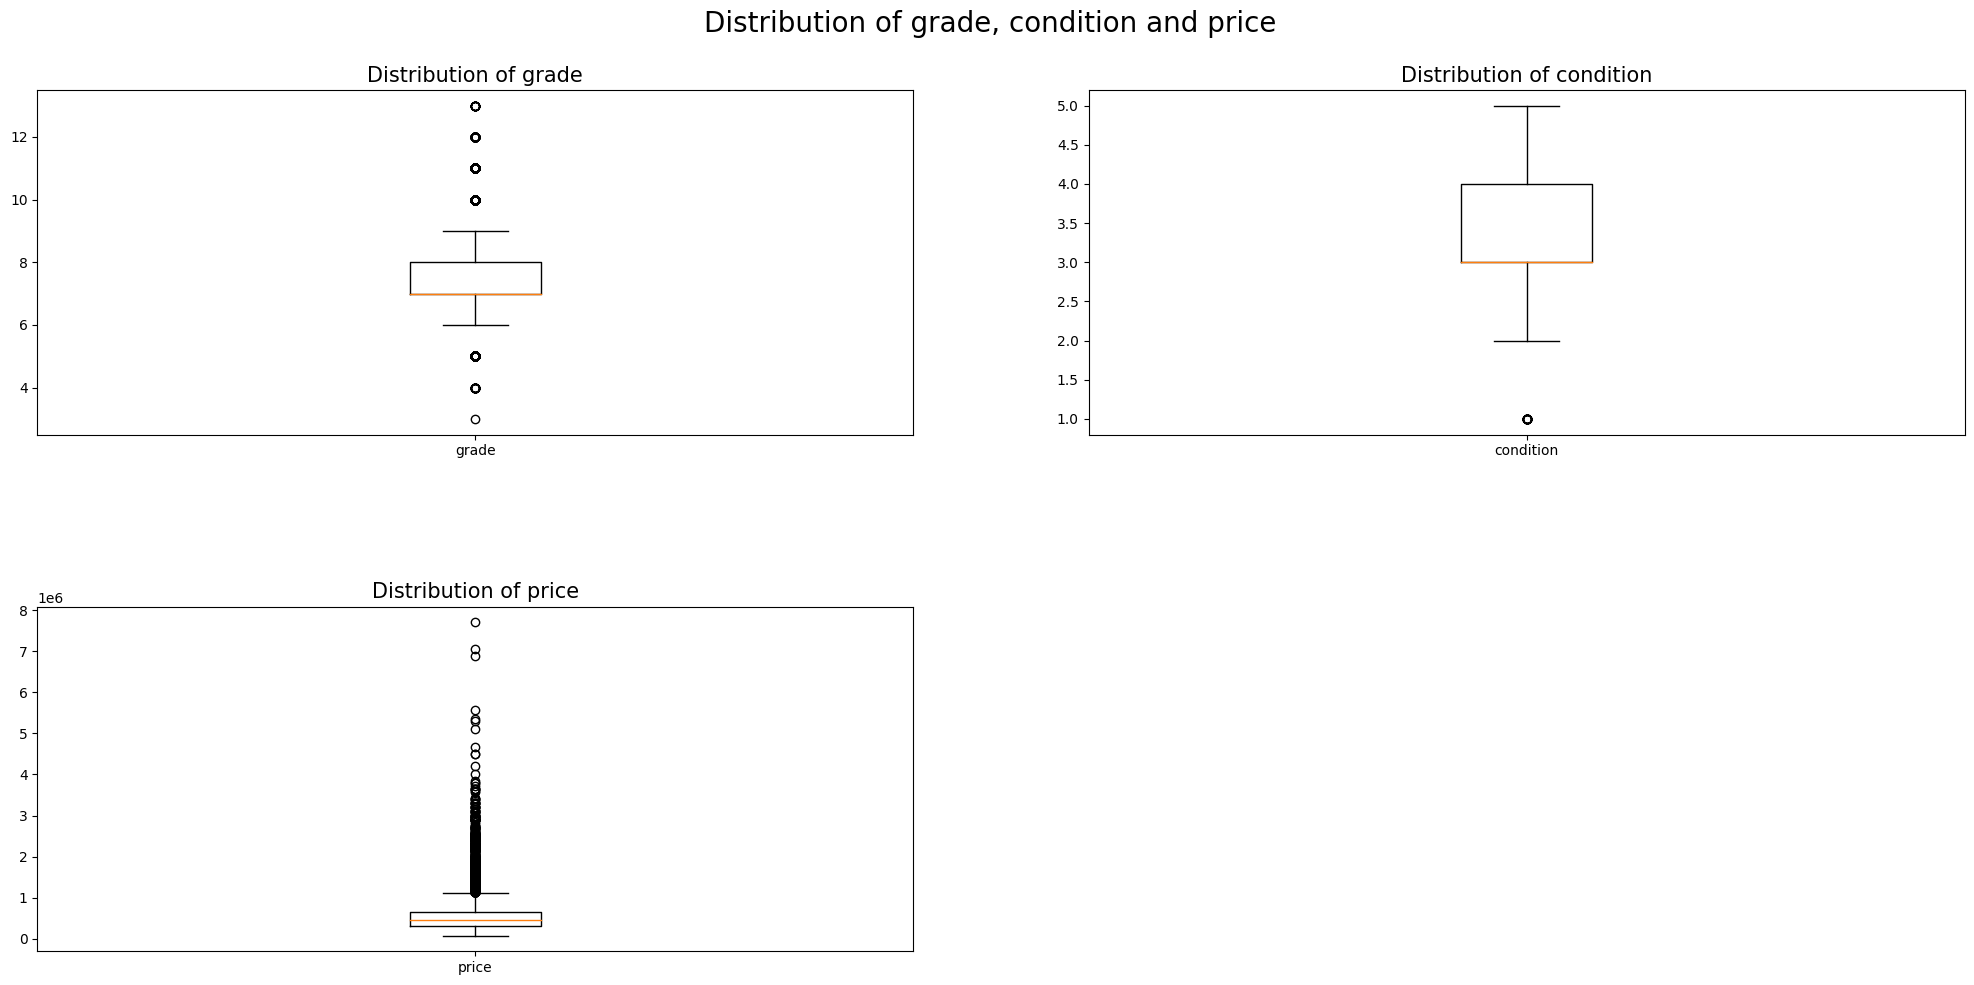

In [294]:
fig, ax = plt.subplots(2,2, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of grade, condition and price', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df["grade"]) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["grade"]) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of grade", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df['condition'])
ax[0][1].set_xticklabels(labels=["condition"])
#ax[0][1].set_ylim(0,50000)
ax[0][1].set_title("Distribution of condition", fontsize = 15);

ax[1][0].boxplot(x = df['price'])
ax[1][0].set_xticklabels(labels=["price"])
#ax[0][2].set_ylim(0,6000)
ax[1][0].set_title("Distribution of price", fontsize = 15);

fig.delaxes(ax[1][1])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

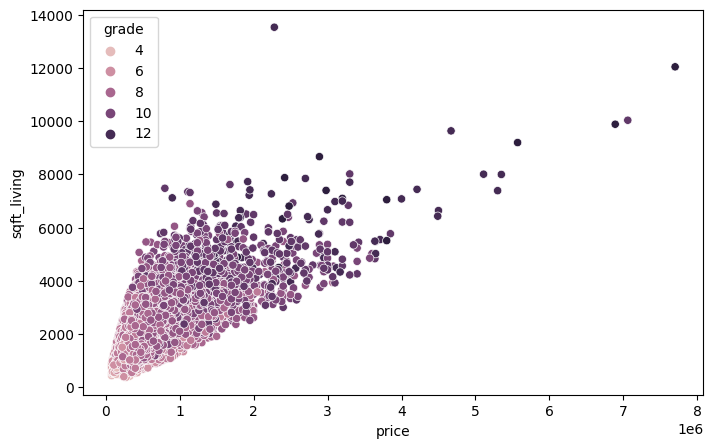

In [312]:
# House price in comparison to available living space, with grade added

sns.scatterplot(x=df['price'], y=df['sqft_living'], hue=df.grade)

# general tendency of growing living space with growing price, while the grade also has influence on price
# > with low price usually comes with small living space and low grade

Text(0.5, 0, 'Price in million $')

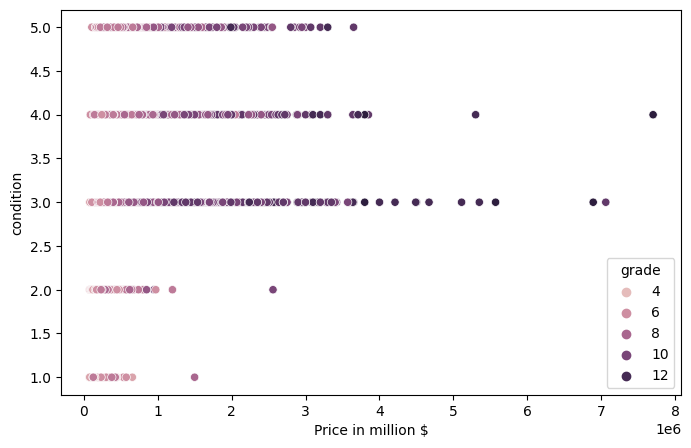

In [316]:
# plotting price in relation to condition, with grade added as third dimension
plo1 = sns.scatterplot(x=df['price'], y=df['condition'], hue=df['grade'])
#ax.set_xlabel("Price in million $")
plo1.set_xlabel("Price in million $")

# plot is heavily skwed to the right, checking for amount of houses with a price > 1.000.000

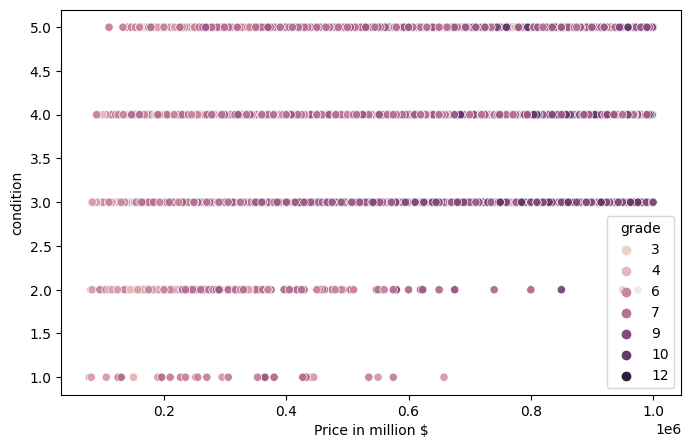

In [317]:
dfscat = df.copy()
# dfscat = df[df['price'] > 1000000] ## 1458 rows with houses over 1M, filtering these out
dfscat = df[df['price'] < 1000000]
dfscat.name = "fprice"
#dfscat

plo2 =sns.scatterplot(x=dfscat['price'], y=dfscat['condition'], hue=dfscat['grade'])
plo2.set_xlabel("Price in million $")

plt.show()

#plot shows a tendency of higher grade houses to be in the higher price range, 
#as well as a tendency of higher condition with higher price

# > stakeholder should search for houses with low price and lower conditions + grade
# improving the house by renovating will likely raise grade and should improve condition ranking

renovated houses have higher grades then unrenovated houses

In [298]:
df.yr_renovated # either has year of renovation or an NaN/zero if never renovated
#df.condition.unique() # condition has values from 1-5
#df.waterfront.unique() # yes, no, not available
#df.floors.unique() # apparently floor ranges from 1-3.5
#df.grade.unique() #grade from 3 to 13

df2= df.copy()
df2[df2.yr_renovated.isnull()]

df2['yr_renovated'] = df2.yr_renovated.replace(np.NaN,0) # replacing empty values with zero

#according to different websites it is suggested to renovate a house every 15-20 years. Thus we will consider any house built in the last 20 years renovated as well. Let's define a new metric for this
df2['renovated'] = (df['yr_built'] > 1995) | (df['yr_renovated'] > 1995)
#df2['renovated'].value_counts()


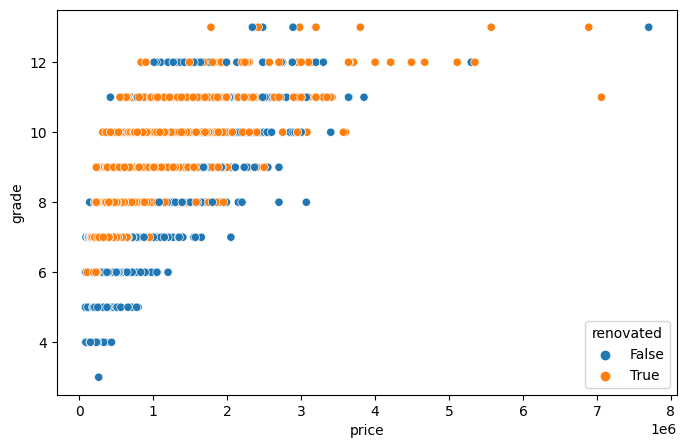

503954.52046595444 633493.936128074
7.395868194104775 8.329922429443803
1.2570458452130717
129539.41566211951
0.934054235339028
1.1262940618768138


In [321]:
# plot the grade based on the note and colour it whether it is a renovated property or not
#further print the average values for price, grade and also give the difference between them

sns.scatterplot(x=df2['price'], y=df2['grade'],hue=df2['renovated'])

plt.show()
print(df2.query('renovated == False').price.mean(), df2.query('renovated == True').price.mean())
print(df2.query('renovated == False').grade.mean(), df2.query('renovated == True').grade.mean())

print((df2.query('renovated == True').price.mean())/(df2.query('renovated == False').price.mean()))
print((df2.query('renovated == True').price.mean())-(df2.query('renovated == False').price.mean()))

print((df2.query('renovated == True').grade.mean())-(df2.query('renovated == False').grade.mean()))
print((df2.query('renovated == True').grade.mean())/(df2.query('renovated == False').grade.mean()))

Yes, both price of renovated houses and grade are significantly higher. 

In [334]:
#define price per sqft by dividing price by the sqft_living value
# then place these into 10 bins and add to a new dataframe
df2['price_sqr_living']= (df2['price'] / df2['sqft_living'])
df2_bins=pd.cut(df2['price_sqr_living'],10,labels=[1,2,3,4,5,6,7,8,9,10])
df2_bins.name='sqt_price_bins'
df2_join = df2.join(df2_bins)

#group by the zipcode and calculate the average for the price per sqft for living space, display them sorted by price in ascending order
df3 = df2.groupby(['zipcode']).mean()['price_sqr_living'].reset_index()
df3.sort_values('price_sqr_living').head(10)

,zipcode,price_sqr_living
13,98023,148.922
1,98002,151.174
0,98001,151.348
20,98032,154.220
18,98030,155.156
40,98092,155.814
2,98003,157.113
19,98031,161.102
26,98042,164.378
67,98188,169.007


<AxesSubplot:xlabel='zipcode', ylabel='price_sqr_living'>

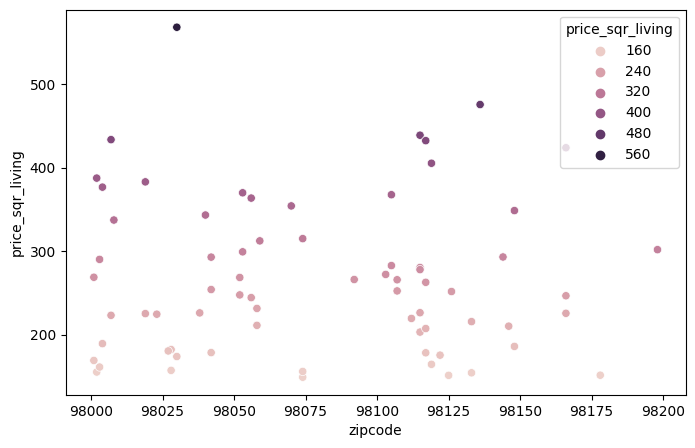

In [333]:
#plot values grouped above visually
sns.scatterplot(x=df2['zipcode'], y= df3['price_sqr_living'], hue=df3['price_sqr_living'])

In [301]:
fig = plx.density_mapbox(df2, lat='lat', lon='long', z='price', radius=10,
                        center=dict(lat=df.lat.mean(), lon=df.long.mean()), zoom=8,
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [302]:
fig = plx.density_mapbox(df, lat='lat', lon='long', z='grade', radius=10,
                        center=dict(lat=df.lat.mean(), lon=df.long.mean()), zoom=8,
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [303]:
#df2['price_sqr_living']= df2['price'] / df2['sqft_living']


#fig = plx.density_mapbox(df2, lat='lat', lon='long', z='price_sqr_living', radius=10,
#                        center=dict(lat=0, lon=180), zoom=0,
#                        mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [309]:


fig = plx.density_mapbox(df2_join[df2_join['sqt_price_bins'] == 1], lat='lat', lon='long', z='price_sqr_living', radius=10,
                       zoom=8,
                      mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [308]:
fig = plx.density_mapbox((df2_join[(df2_join['sqt_price_bins'] == 1) & (df2_join['renovated'] == False)]), lat='lat', lon='long', z='price_sqr_living', radius=10,
                        zoom=8,
                      mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [335]:
# rounding of price_sqft_living to 2 decimals
# displaying the smallest bin(10%) of price_sqr_living & unrenovated houses, while displaying their grade through colour

df2_join['price_sqr_living']=round(df2_join.price_sqr_living, 2)
fig = plx.scatter_mapbox((df2_join[(df2_join['sqt_price_bins'] == 1) & (df2_join['renovated'] == False)]), lat="lat", lon="long", hover_data=['price_sqr_living', 'zipcode'],
                        color="grade", zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # sets the margin from the left, top, right and bottom order
fig.update_layout(title_text='Houses in the lower range of price/sqft ', title_x=0.5) # sets a title for the plot and centers it
fig.show()